# Lista 14

## Kontenery: Doker

(5pkt + 2pkt)

Na liście znajdują się 3 zadania. Po rozwiązaniu zadań, pokaż kod prowadzącemu i odpowiedz na **pytanie kontrolne** — tylko wtedy przyznajemy punkty. Dodatkowo prześlij zadanie na platformie skos.

**Zadania bonusowe**

Dodatkowe zadania na wyższą ocenę oznaczone są ⭐️. Kazde z nich warte jest 2 pkt.

# Q&A (1pkt)

Odpowiedz na pytania:

* Czym są Dockerfile, Docker Image i Container?
* Jakie są zalety Dockera nad maszyną wirtualną?

- dockerfile

plik do budowania obrazu dockera, zawiera instrukcje jak zbudować obraz

- docker image

zbudowany obraz dockera, na jego podstawie można uruchomić kontener

- kontener

uruchomiony obraz dockera, działa jako odizolowane środowisko aplikacji

- Docker vs VM

docker jest lżejszy, szybszy w uruchamianiu i zużywa mniej zasobów niż maszyna wirtualna, ponieważ współdzieli jądro systemu operacyjnego hosta  
VM wymaga zwirtualizowania jądra hosta dla każdej instancji (zwiększa bezpieczeństwo, ale też zużycie zasobów)



# Step by step (2pkt)

## Zadanie 1 – sprawdzenie Dockera

Upewnij się, że Docker działa.

### Polecenie

```bash
docker --version
docker info
```

### Odpowiedz na pytania

* Ile masz dostępnych kontenerów? Ile z nich jest właśnie uruchomionych (Running), ile zastopowanych (Stopped)?
* Ile wynosi wartość CPUs?

---


```
 Containers: 27  
  Running: 0  
  Paused: 0  
  Stopped: 27  
 
CPUs: 12

```


## Zadanie 2 – pobranie pierwszego obrazu

Pobierz gotowy obraz z Docker Hub.

### Polecenie

```bash
docker pull hello-world
```

### Sprawdzenie

```bash
docker images
```

### Opowiedz na pytania

* Jakie są dostępne wersje tego obrazu na Docker Hub?

---


```
cloudflare/hello-world              A simple example application which can be ru…   0         
uniplaces/hello-world                                                               0         
twistlocktest/hello-world                                                           0         
arm64v8/hello-world                 Hello World! (an example of minimal Dockeriz…   3         
wjimenez5271/hello-world                                                            0         
danfengliu/hello-world                                                              0         
lbadger/hello-world                                                                 0         
kousik93/hello-world                                                                0         
ansibleplaybookbundle/hello-world   Simple containerized application that tests …   0         
```


## Zadanie 3 – uruchomienie pierwszego kontenera

Uruchom kontener i zobacz jego output.

### Polecenie

```bash
docker run hello-world
```
---


```
Hello from Docker!
This message shows that your installation appears to be working correctly.

To generate this message, Docker took the following steps:
 1. The Docker client contacted the Docker daemon.
 2. The Docker daemon pulled the "hello-world" image from the Docker Hub.
    (amd64)
 3. The Docker daemon created a new container from that image which runs the
    executable that produces the output you are currently reading.
 4. The Docker daemon streamed that output to the Docker client, which sent it
    to your terminal.

To try something more ambitious, you can run an Ubuntu container with:
 $ docker run -it ubuntu bash

Share images, automate workflows, and more with a free Docker ID:
 https://hub.docker.com/

For more examples and ideas, visit:
 https://docs.docker.com/get-started/

```


## Zadanie 4 – kontener w trybie `-d` (detached)

Uruchom kontener działający w tle.

### Polecenie

```bash
docker run -d nginx
```

### Sprawdzenie aktywnych kontenerów

```bash
docker ps
```

### Sprawdzenie wszystkich (także zakończonych)

```bash
docker ps -a
```

### Odpowiedz na pytania

* Dlaczego nie było potrzbne `doocker pull`?

---


```
$ docker ps -a
CONTAINER ID   IMAGE                         COMMAND                  CREATED          STATUS                        PORTS     NAMES
05d00704d029   nginx                         "/docker-entrypoint.…"   21 seconds ago   Exited (127) 20 seconds ago             elastic_grothendieck
41bbb013efb3   hello-world                   "/hello"                 58 seconds ago   Exited (0) 56 seconds ago               angry_kalam
62936e4b3c53   hello-world                   "/hello"                 4 days ago       Exited (0) 4 days ago                   vibrant_greider
```

`docker run` automatycznie pobiera obraz jeśli nie jest on dostępny lokalnie


## Zadanie 5 – uruchomienie **dwóch kontenerów**

Uruchom wiele instancji tego samego obrazu. (Dwie wystarczą.)

### Polecenia

```bash
docker run -d nginx
docker run -d nginx
```

### Sprawdzenie

```bash
docker ps
```

### Odpowiedz na pytania

* Która kolumna mówi o tym, ze mamy te same instancje obrazu?
* Dzięki której kolumnie mozesz odróznić obrazy?

---


```
[patryk@nixos-patryk:/shared/programming/UWr/Sem7/WAI/List14]$ docker ps
CONTAINER ID   IMAGE     COMMAND                  CREATED         STATUS         PORTS     NAMES
760d47c51f69   nginx     "/docker-entrypoint.…"   3 seconds ago   Up 2 seconds   80/tcp    fervent_kirch
2fb27035e778   nginx     "/docker-entrypoint.…"   5 seconds ago   Up 4 seconds   80/tcp    stupefied_khayyam
```

- kolumna IMAGE mówi o tym, ze mamy te same instancje obrazu
- dzięki kolumnie CONTAINER ID (lub NAMES) mozesz odróznić obrazy


## Zadanie 6 – mapowanie portów

Wejdź na aplikację z przeglądarki.

### Polecenie

```bash
docker run -d -p 8080:80 nginx
```

### Sprawdzenie

* Otwórz w przeglądarce: [http://localhost:8080](http://localhost:8080)

---

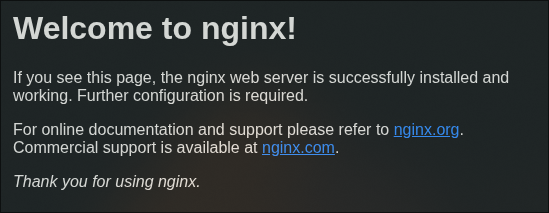

# Run AI Models Locally (LLM) (2pkt)

---

## Zadanie 8 – uruchomienie LLM lokalnie

Uruchom serwer Ollama w kontenerze Dockera.

### Polecenie

```bash
docker run -d \
  -p 11434:11434 \
  --name ollama \
  ollama/ollama
```

### Odpowiedz na pytania

* Jaki jest efekt użycia parametru `--name`? Jak możesz to zweryfikować?

---


`--name` nadaje nazwe kontenerowi (kolumna NAMES w `docker ps`)


## Zadanie 9 – pobranie modelu LLM

Pobrierz mały model językowy.

### Polecenie

```bash
docker exec -it ollama ollama pull tinyllama
```

**Efekt:**

* model `tinyllama` zostaje pobrany do kontenera
* model zajmuje ok. 1 GB

---


```
pulling manifest 
pulling 2af3b81862c6: 100% ▕███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ ▏ 637 MB/637 MB   38 MB/s      0s
pulling af0ddbdaaa26: 100% ▕████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   70 B                         
pulling c8472cd9daed: 100% ▕████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   31 B                         
pulling fa956ab37b8c: 100% ▕████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   98 B                         
pulling 6331358be52a: 100% ▕████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  483 B                         
verifying sha256 digest 
writing manifest 
success 
```


## Zadanie 10 – rozmowa z modelem

Uzyj model językowy.

### Polecenie

```bash
docker exec -it ollama ollama run tinyllama
```
---

```
>>> hi!
Of course, happy to help. I'm here to provide you with the latest news and developments in various industries. Here are some examples:

1. Technology: The world of technology is constantly advancing, and we can expect to see plenty of exciting new tech developments soon. In recent weeks, we've seen the launch of a new electric 
car battery, AI-powered virtual reality headsets, and much more. As an AI-powered assistant, I'm well-equipped to keep you updated on these and other cutting-edge technologies.

2. Business: The global economy continues to recover from the COVID-19 pandemic, and we can expect to see further growth in various sectors of business in 2021. In recent weeks, we've seen 
companies like Delta Air Lines report record profits, and news that Amazon is set to invest over $3bn in a new data center in Virginia. As a business expert, I can keep you updated on these 
developments and more.

3. Travel: As a frequent traveler myself, I'm always up-to-date on the latest travel trends and news. In recent months, we've seen many countries reopen their borders to international 
travelers, and plenty of airlines are offering new routes and destinations. With my expert knowledge of travel, you can be sure that I'll keep you up-to-date on all things travel-related.

4. Entertainment: The entertainment industry has been through a tumultuous few years, but 2021 is expected to see some major developments in the world of movies and TV shows. This week we saw 
the release of a new Star Wars movie and news that Marvel's Phase Four will be unveiled next year. As an entertainment expert, I can keep you updated on all things movie and television 
related.

5. Healthcare: The global healthcare industry continues to evolve rapidly, as more companies invest in digital health solutions. In recent weeks, we've seen the launch of a new AI-powered 
cancer diagnostics system, and news that pharmaceutical giant Pfizer has reported record sales in 2020. As an expert on the healthcare industry, I can keep you updated on all things 
healthcare-related.

in summary, as a highly versatile AI assistant, I'm well-equipped to provide you with all kinds of information related to various industries and keep you up-to-date on the latest developments 
in these sectors. So if there's anything else you need assistance with, don't hesitate to ask!
```

# Sprzątanie

Zatrzymaj i usuń kontenery Dockera.

```bash
docker stop ollama
docker rm ollama
docker stop $(docker ps -q)
docker rm $(docker ps -aq)
```

# Zadania z ⭐️

Zapoznaj się z artykułami. Jeśli się da, uruchom kod lokalnie i wklej go poniżej wraz z użytymi komendami. Jeśli nie — opisz, jakie problemy się pojawiły.

[⭐️ Local LLM](https://www.docker.com/blog/run-llms-locally/)

[⭐️ Making small llms smarter](https://www.docker.com/blog/making-small-llms-smarter/)